In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Soal No. 1

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

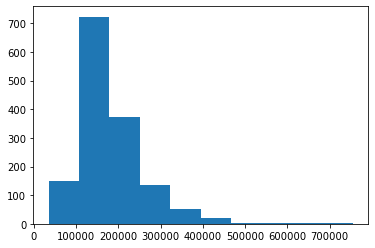

In [6]:
plt.hist(df['SalePrice'])
plt.show()

In [7]:
x = df['SalePrice']

## Measure of Central Tendency

### Mean, Median, dan Modus

In [8]:
print('Rata-rata Harga Rumah : ',x.mean())
print('Median Harga Rumah : ',x.median())
print('Modus: ',x.mode()[0])

Rata-rata Harga Rumah :  180921.19589041095
Median Harga Rumah :  163000.0
Modus:  140000


## Measure of Spread

### Range

In [9]:
print('Range Harga Rumah : ', x.max()-x.min())

Range Harga Rumah :  720100


### Variance

In [10]:
print(x.var())

6311111264.297451


### Standar Deviation

In [11]:
print(x.std())

79442.50288288663


### Quartile

In [12]:
print('Inter Quartile Range: ', x.quantile(0.75) - x.quantile(0.25))

Inter Quartile Range:  84025.0


## Interpretasi

Mean, Median , dan modus bertujuan untuk melihat hasil rata-rata, nilai tengah dan modus dari harga rumah tersebut.

kita juga dapat menggunakan range untuk mendapatkan rentang harga rumah dari yang termurah hingga yang termahal.

variace digunakan untuk mengetahui seberapa jauh data yang dimiliki tersebar.

standar deviation digunakan karena memberikan informasi yang jelas dan intuitif.

Interquartile digunakan untuk mencari outlier (data yang ekstrim).

# Soal No.2

In [13]:
df[['SalePrice','YrSold']].describe()

,SalePrice,YrSold
count,1460.000000,1460.000000
mean,180921.195890,2007.815753
std,79442.502883,1.328095
min,34900.000000,2006.000000
25%,129975.000000,2007.000000
50%,163000.000000,2008.000000
75%,214000.000000,2009.000000
max,755000.000000,2010.000000


In [14]:
y = df[['SalePrice', 'YrSold']]
y

,SalePrice,YrSold
0,208500,2008
1,181500,2007
2,223500,2008
3,140000,2006
4,250000,2008
...,...,...
1455,175000,2007
1456,210000,2010
1457,266500,2010
1458,142125,2010


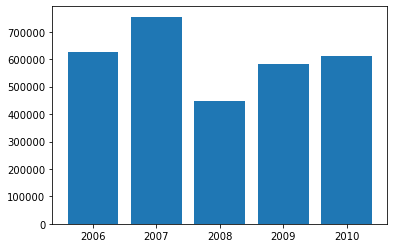

In [15]:
fig, axs = plt.subplots()
axs.bar(y['YrSold'], y['SalePrice'])
plt.show()

In [16]:
y.loc[(y['YrSold'] == 2008), :].max()

SalePrice    446261
YrSold         2008
dtype: int64

## Measure of Central Tendency

### Mean, Median, dan Modus

In [17]:
print('Rata-rata Harga Rumah : ',y.loc[y['YrSold'] == 2006].mean())
print('Rata-rata Harga Rumah : ',y.loc[y['YrSold'] == 2007].mean())
print('Rata-rata Harga Rumah : ',y.loc[y['YrSold'] == 2008].mean())
print('Rata-rata Harga Rumah : ',y.loc[y['YrSold'] == 2009].mean())
print('Rata-rata Harga Rumah : ',y.loc[y['YrSold'] == 2010].mean())
print('=' * 50)
print('Median Harga Rumah : ',y.loc[y['YrSold'] == 2006].median())
print('Median Harga Rumah : ',y.loc[y['YrSold'] == 2007].median())
print('Median Harga Rumah : ',y.loc[y['YrSold'] == 2008].median())
print('Median Harga Rumah : ',y.loc[y['YrSold'] == 2009].median())
print('Median Harga Rumah : ',y.loc[y['YrSold'] == 2010].median())
print('=' * 50)
print('Modus: ',y.loc[y['YrSold'] == 2006].mode())
print('Modus: ',y.loc[y['YrSold'] == 2007].mode())
print('Modus: ',y.loc[y['YrSold'] == 2008].mode())
print('Modus: ',y.loc[y['YrSold'] == 2009].mode())
print('Modus: ',y.loc[y['YrSold'] == 2010].mode())

Rata-rata Harga Rumah :  SalePrice    182549.458599
YrSold         2006.000000
dtype: float64
Rata-rata Harga Rumah :  SalePrice    186063.151976
YrSold         2007.000000
dtype: float64
Rata-rata Harga Rumah :  SalePrice    177360.838816
YrSold         2008.000000
dtype: float64
Rata-rata Harga Rumah :  SalePrice    179432.10355
YrSold         2009.00000
dtype: float64
Rata-rata Harga Rumah :  SalePrice    177393.674286
YrSold         2010.000000
dtype: float64
Median Harga Rumah :  SalePrice    163995.0
YrSold         2006.0
dtype: float64
Median Harga Rumah :  SalePrice    167000.0
YrSold         2007.0
dtype: float64
Median Harga Rumah :  SalePrice    164000.0
YrSold         2008.0
dtype: float64
Median Harga Rumah :  SalePrice    162000.0
YrSold         2009.0
dtype: float64
Median Harga Rumah :  SalePrice    155000.0
YrSold         2010.0
dtype: float64
Modus:     SalePrice  YrSold
0     140000    2006
Modus:     SalePrice  YrSold
0     129000  2007.0
1     144000     NaN
Modus:

## Measure of Spread

### Variance

In [18]:
y.var()

SalePrice    6.311111e+09
YrSold       1.763837e+00
dtype: float64

### Range

In [19]:
print('Range Harga Rumah th 2006 : ', y.loc[y['YrSold'] == 2006].max()-y.loc[y['YrSold'] == 2006].min())
print('Range Harga Rumah th 2007 : ', y.loc[y['YrSold'] == 2007].max()-y.loc[y['YrSold'] == 2007].min())
print('Range Harga Rumah th 2008 : ', y.loc[y['YrSold'] == 2008].max()-y.loc[y['YrSold'] == 2008].min())
print('Range Harga Rumah th 2009 : ', y.loc[y['YrSold'] == 2009].max()-y.loc[y['YrSold'] == 2009].min())
print('Range Harga Rumah th 2010 : ', y.loc[y['YrSold'] == 2010].max()-y.loc[y['YrSold'] == 2010].min())

Range Harga Rumah th 2006 :  SalePrice    589689
YrSold            0
dtype: int64
Range Harga Rumah th 2007 :  SalePrice    715700
YrSold            0
dtype: int64
Range Harga Rumah th 2008 :  SalePrice    406261
YrSold            0
dtype: int64
Range Harga Rumah th 2009 :  SalePrice    548033
YrSold            0
dtype: int64
Range Harga Rumah th 2010 :  SalePrice    556657
YrSold            0
dtype: int64


### Standar Deviation

In [20]:
y.std()

SalePrice    79442.502883
YrSold           1.328095
dtype: float64

### Quartile

In [21]:
print('Inter Quartile Range: ', y.quantile(0.75) - y.quantile(0.25))

Inter Quartile Range:  SalePrice    84025.0
YrSold           2.0
dtype: float64


In [22]:
y.groupby('YrSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


## Interpretasi

secara hasil yang di tampilkan tabel di atas kita dapat tahu bahwa harga rumah setiap tahun selalu mengalami kenaikan harga, tapi di tahun 2008 kita bisa lihat bahwa sempat mengalamami penurunan harga yang di sebabkan oleh krisis moneter di tahun tersebut dan mengalami kenaikan lagi di tahun berikut nya yaitu tahun 2009 dan 2010.

# Soal No.3

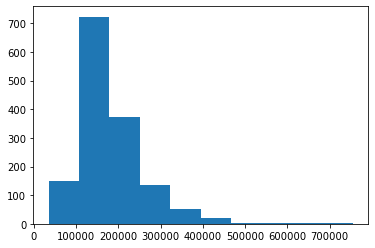

In [18]:
plt.hist(y['SalePrice'])
plt.show()

array([[<AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'YrSold'}>]], dtype=object)

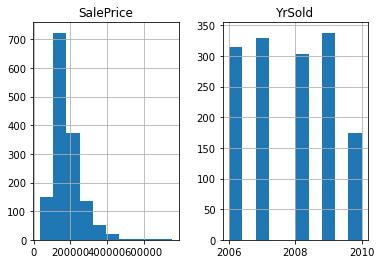

In [19]:
y.hist()

In [40]:
price_rumah = y.groupby('YrSold')['SalePrice'].mean()
price_rumah

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

<AxesSubplot:>

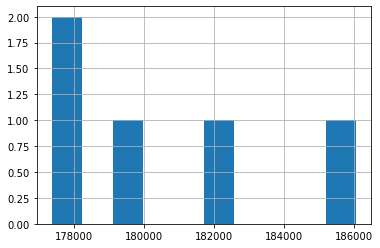

In [41]:
price_rumah.hist()

## Analisa

dari hasil grafik dan tabel di atas saya menggunakan method mean di karenakan saya ingin menunjukkan rata-rata harga rumah pertahun lalu menggunakan plot distribusi dengan rentang harga rumah per tahun.

# Soal No.4

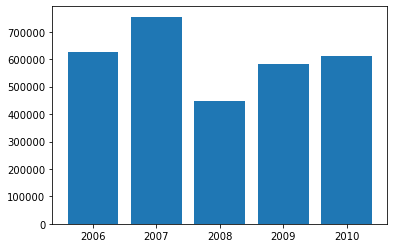

In [26]:
plt.bar(df['YrSold'], y['SalePrice'])
plt.show()

## Interpretasi

Secara grafik yang di tampilkan bahwa setiap tahun harga properti selalu mengalami kenaikan harga karena di sebabkan Inflasi di suatu negara. terlihat juga di tahun 2008 harga properti sempat menurun di karenakan pada tahun tersebut ekonomi global sedang jatuh atau bisa di bilang krisis moneter di tahun 2008, tapi di tahun berikutnya yaitu tahun 2009 dan 2010 harga properti mengalami kenaikan yang cukup signifikan.